## Descriptive statistics

Loading the datasets

In [47]:
import numpy as np
import pandas as pd
from scipy import stats
df=pd.read_csv("training_dataset.csv",sep=";")
df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1921962,353,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,17.45,11.0
1921963,543,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,18.09,11.0
1921964,153,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,23.53,7.0
1921965,351,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,18.49,9.0


In [48]:
df_eval = pd.read_csv("final_evaluation_dataset.csv",sep=";")
df_eval

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,4872,"E4S 56,780",20220105,04:00:00,240,48,16,8,4,17.50,1.0
1,4430,"E4S 57,435",20220105,04:00:00,240,48,16,8,4,24.44,1.0
2,4436,"E4S 57,820",20220105,04:00:00,240,48,16,8,4,23.61,1.0
3,1079,"E4S 56,780",20220105,04:00:00,240,48,16,8,4,23.75,2.0
4,1076,"E4S 55,620",20220105,04:00:00,240,48,16,8,4,21.30,3.0
...,...,...,...,...,...,...,...,...,...,...,...
803496,1079,"E4S 56,780",20220630,10:00:00,600,120,40,20,10,16.77,20.0
803497,1443,"E4S 57,055",20220630,10:00:00,600,120,40,20,10,20.94,24.0
803498,902,"E4S 56,490",20220630,10:00:00,600,120,40,20,10,18.21,19.0
803499,1076,"E4S 55,620",20220630,10:00:00,600,120,40,20,10,17.53,22.0


Plots of the flow and speed

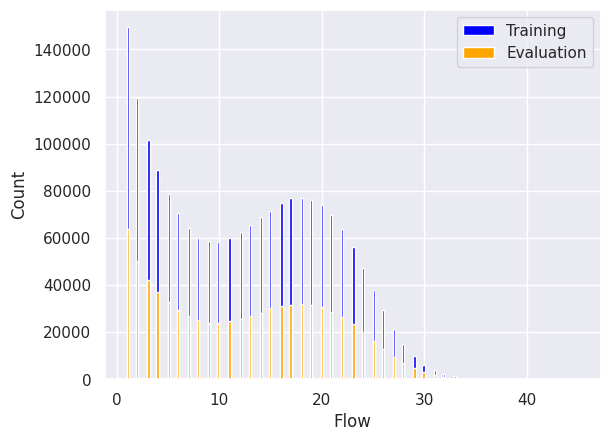

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(df['FLOW'],bins=200,color='blue')
plt.hist(df_eval['FLOW'],bins=200,color='orange')
plt.xlabel('Flow')
plt.ylabel('Count')

plt.legend(labels=['Training','Evaluation'])

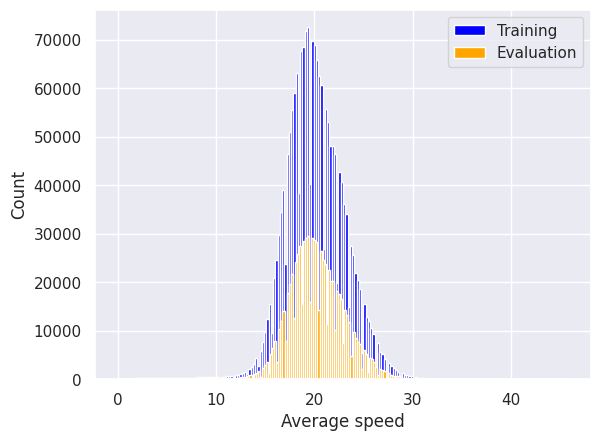

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(df['SPEED_MS_AVG'],bins=200,color='blue')
plt.hist(df_eval['SPEED_MS_AVG'],bins=200,color='orange')
plt.xlabel('Average speed')
plt.ylabel('Count')
plt.legend(labels=['Training','Evaluation'])

Descriptive statistics of the flow and average speed for the training and evaluation datasets

In [51]:
df_desc={'Desc':['Flow'],
                  'Mean':[df['FLOW'].mean()],
                  'Median':[df['FLOW'].median()],
                  'Min':[df['FLOW'].min()],
                  'Max':[df['FLOW'].max()],
                  'Std.dev':[df['FLOW'].std()]}
df_desc_=pd.DataFrame(data=df_desc)
df_desc_

,Desc,Mean,Median,Min,Max,Std.dev
0,Flow,12.365518,12.0,1.0,45.0,8.023255


In [52]:
df_desc={'Desc':['Speed'],
                  'Mean':[df['SPEED_MS_AVG'].mean()],
                  'Median':[df['SPEED_MS_AVG'].median()],
                  'Min':[df['SPEED_MS_AVG'].min()],
                  'Max':[df['SPEED_MS_AVG'].max()],
                  'Std.dev':[df['SPEED_MS_AVG'].std()]}
df_desc_=pd.DataFrame(data=df_desc)
df_desc_

,Desc,Mean,Median,Min,Max,Std.dev
0,Speed,20.027641,19.85,0.0,45.83,3.027135


In [53]:
df_desc_eval={'Desc':['Flow'],
                  'Mean':[df_eval['FLOW'].mean()],
                  'Median':[df_eval['FLOW'].median()],
                  'Min':[df_eval['FLOW'].min()],
                  'Max':[df_eval['FLOW'].max()],
                  'Std.dev':[df_eval['FLOW'].std()]}
df_desc_eval_=pd.DataFrame(data=df_desc_eval)
df_desc_eval_

,Desc,Mean,Median,Min,Max,Std.dev
0,Flow,12.42701,12.0,1.0,45.0,8.116921


In [54]:
df_desc_eval={'Desc':['SPEED_MS_AVG'],
                  'Mean':[df_eval['SPEED_MS_AVG'].mean()],
                  'Median':[df_eval['SPEED_MS_AVG'].median()],
                  'Min':[df_eval['SPEED_MS_AVG'].min()],
                  'Max':[df_eval['SPEED_MS_AVG'].max()],
                  'Std.dev':[df_eval['SPEED_MS_AVG'].std()]}
df_desc_eval_=pd.DataFrame(data=df_desc_eval)
df_desc_eval_

,Desc,Mean,Median,Min,Max,Std.dev
0,SPEED_MS_AVG,20.065057,20.0,0.0,41.9,3.087429


Descriptive statistics of the weekdays and weekends

In [55]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

df['Day_of_Week'] = df['Date'].dt.weekday

df['Weekday'] = df['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)


In [56]:
print(df.groupby('Weekday')['FLOW'].mean())
print(df.groupby('Weekday')['FLOW'].median())
print(df.groupby('Weekday')['FLOW'].min())
print(df.groupby('Weekday')['FLOW'].max())
print(df.groupby('Weekday')['FLOW'].std())

Weekday
0     7.460273
1    14.099803
Name: FLOW, dtype: float64
Weekday
0     5.0
1    15.0
Name: FLOW, dtype: float64
Weekday
0    1.0
1    1.0
Name: FLOW, dtype: float64
Weekday
0    41.0
1    45.0
Name: FLOW, dtype: float64
Weekday
0    6.358577
1    7.830860
Name: FLOW, dtype: float64


In [57]:
print(df.groupby('Weekday')['SPEED_MS_AVG'].mean())
print(df.groupby('Weekday')['SPEED_MS_AVG'].median())
print(df.groupby('Weekday')['SPEED_MS_AVG'].min())
print(df.groupby('Weekday')['SPEED_MS_AVG'].max())
print(df.groupby('Weekday')['SPEED_MS_AVG'].std())

Weekday
0    21.017169
1    19.677795
Name: SPEED_MS_AVG, dtype: float64
Weekday
0    20.83
1    19.46
Name: SPEED_MS_AVG, dtype: float64
Weekday
0    0.56
1    0.00
Name: SPEED_MS_AVG, dtype: float64
Weekday
0    45.83
1    43.90
Name: SPEED_MS_AVG, dtype: float64
Weekday
0    2.864954
1    3.005466
Name: SPEED_MS_AVG, dtype: float64


Average flow and speed over time

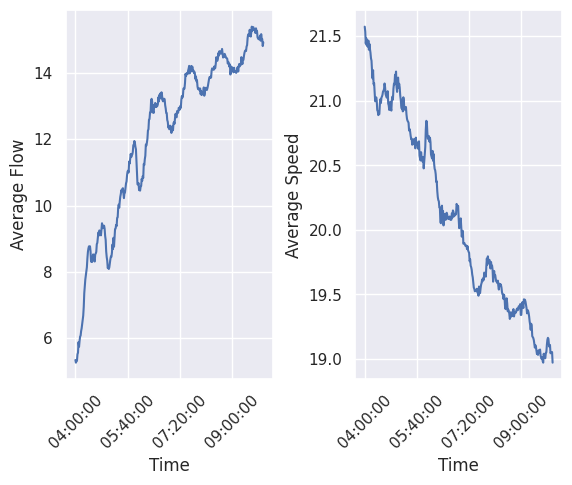

In [58]:
plt.subplot(1,2,1)
df.groupby('Time')['FLOW'].mean().plot()
plt.xticks(rotation=45)
plt.ylabel("Average Flow")

plt.subplot(1,2,2)
df.groupby('Time')['SPEED_MS_AVG'].mean().plot()
plt.xticks(rotation=45)
plt.ylabel("Average Speed")

plt.subplots_adjust(wspace=0.4)

## Model creation

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
data_df = pd.read_csv("training_dataset.csv",sep=";")
data_df
data_df.iloc[0:40,:]
data_df.shape
data_df.dropna(subset=['FLOW'], inplace=True)
data_df['Z_SCORE'] = stats.zscore(data_df['FLOW'])
threshold = 3
data_df_outlier = data_df[(data_df['Z_SCORE'].abs() <= threshold)].drop(columns=['Z_SCORE'])
data_df_outlier.iloc[0:40,:]


,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
5,536,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,28.35,2.0
6,4872,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,16.39,1.0
7,4873,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,15.28,1.0
8,4430,"E4S 57,435",20210601,04:00:00,240,48,16,8,4,18.61,3.0
9,4429,"E4S 57,435",20210601,04:00:00,240,48,16,8,4,23.33,1.0


In [60]:
data_df_eval = pd.read_csv("final_evaluation_dataset.csv",sep=";")
data_df_eval
data_df_eval.iloc[0:40,:]
data_df_eval['Z_SCORE'] = stats.zscore(data_df_eval['FLOW'])
data_df_eval['Z_SCORE'] = stats.zscore(data_df['FLOW'])
threshold = 3
data_df_outlier_eval = data_df_eval[(data_df_eval['Z_SCORE'].abs() <= threshold)].drop(columns=['Z_SCORE'])

In [61]:
interval = np.unique(data_df['PORTAL'])
length = len(interval)
interval
#data_df.drop([])
#data_df["FLOW30"] = 0

array(['E4S 55,620', 'E4S 56,160', 'E4S 56,490', 'E4S 56,780',
       'E4S 57,055', 'E4S 57,435', 'E4S 57,820', 'E4S 58,140'],
      dtype=object)

In [62]:
data_df_outlier['Date'] = pd.to_datetime(data_df_outlier['Date'], format='%Y%m%d')

data_df_outlier['Day_of_Week'] = data_df_outlier['Date'].dt.weekday

data_df_outlier_eval['Date'] = pd.to_datetime(data_df_outlier_eval['Date'], format='%Y%m%d')

data_df_outlier_eval['Day_of_Week'] = data_df_outlier_eval['Date'].dt.weekday

#data_df_outlier['Day_of_Week'] = data_df_outlier['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)
#data_df_outlier_eval['Day_of_Week'] = data_df_outlier_eval['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)
data_df_outlier.iloc[40000:40040,:]

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week
40008,4873,"E4S 56,490",2021-06-05,04:20:00,260,52,17,8,4,16.11,1.0,5
40009,4428,"E4S 57,820",2021-06-05,04:20:00,260,52,17,8,4,23.61,1.0,5
40010,4430,"E4S 57,435",2021-06-05,04:20:00,260,52,17,8,4,23.06,5.0,5
40011,4439,"E4S 57,820",2021-06-05,04:20:00,260,52,17,8,4,21.94,2.0,5
40012,4872,"E4S 56,780",2021-06-05,04:20:00,260,52,17,8,4,21.39,1.0,5
40013,4473,"E4S 58,140",2021-06-05,04:21:00,261,52,17,8,4,20.28,1.0,5
40014,4439,"E4S 57,820",2021-06-05,04:21:00,261,52,17,8,4,20.00,1.0,5
40015,4436,"E4S 57,820",2021-06-05,04:21:00,261,52,17,8,4,23.89,3.0,5
40016,4494,"E4S 58,140",2021-06-05,04:21:00,261,52,17,8,4,24.17,3.0,5
40017,4428,"E4S 57,820",2021-06-05,04:21:00,261,52,17,8,4,21.67,1.0,5


In [63]:
df_summed = data_df_outlier.groupby(['PORTAL', 'Date', 'Time'], as_index=False).agg({
    'Interval_1': 'first',
    'Interval_5': 'first',
    'Interval_15': 'first',
    'Interval_30': 'first',
    'Interval_60': 'first',
    'SPEED_MS_AVG': 'sum',
    'FLOW': 'sum',
    'Day_of_Week': 'first'
})
df_summed_eval = data_df_outlier_eval.groupby(['PORTAL', 'Date', 'Time'], as_index=False).agg({
    'Interval_1': 'first',
    'Interval_5': 'first',
    'Interval_15': 'first',
    'Interval_30': 'first',
    'Interval_60': 'first',
    'SPEED_MS_AVG': 'sum',
    'FLOW': 'sum',
    'Day_of_Week': 'first'
})
df_summed.iloc[0:40,:]

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week
0,"E4S 55,620",2021-06-01,04:00:00,240,48,16,8,4,66.33,29.0,1
1,"E4S 55,620",2021-06-01,04:01:00,241,48,16,8,4,70.60,26.0,1
2,"E4S 55,620",2021-06-01,04:02:00,242,48,16,8,4,65.49,38.0,1
3,"E4S 55,620",2021-06-01,04:03:00,243,48,16,8,4,68.21,34.0,1
4,"E4S 55,620",2021-06-01,04:04:00,244,48,16,8,4,70.01,29.0,1
5,"E4S 55,620",2021-06-01,04:05:00,245,49,16,8,4,67.76,27.0,1
6,"E4S 55,620",2021-06-01,04:06:00,246,49,16,8,4,63.82,38.0,1
7,"E4S 55,620",2021-06-01,04:07:00,247,49,16,8,4,64.59,40.0,1
8,"E4S 55,620",2021-06-01,04:08:00,248,49,16,8,4,70.37,31.0,1
9,"E4S 55,620",2021-06-01,04:09:00,249,49,16,8,4,67.51,41.0,1


In [64]:
new_df = df_summed.reset_index()
new_df['PREFLOW15'] = new_df.groupby(['PORTAL','Date'])['FLOW'].transform(lambda x: x.rolling(window=15,min_periods=14).sum().shift(1))
new_df['PREFLOW15'] = new_df['PREFLOW15'].fillna(0)
new_df.iloc[0:60,:]

,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15
0,0,"E4S 55,620",2021-06-01,04:00:00,240,48,16,8,4,66.33,29.0,1,0.0
1,1,"E4S 55,620",2021-06-01,04:01:00,241,48,16,8,4,70.60,26.0,1,0.0
2,2,"E4S 55,620",2021-06-01,04:02:00,242,48,16,8,4,65.49,38.0,1,0.0
3,3,"E4S 55,620",2021-06-01,04:03:00,243,48,16,8,4,68.21,34.0,1,0.0
4,4,"E4S 55,620",2021-06-01,04:04:00,244,48,16,8,4,70.01,29.0,1,0.0
5,5,"E4S 55,620",2021-06-01,04:05:00,245,49,16,8,4,67.76,27.0,1,0.0
6,6,"E4S 55,620",2021-06-01,04:06:00,246,49,16,8,4,63.82,38.0,1,0.0
7,7,"E4S 55,620",2021-06-01,04:07:00,247,49,16,8,4,64.59,40.0,1,0.0
8,8,"E4S 55,620",2021-06-01,04:08:00,248,49,16,8,4,70.37,31.0,1,0.0
9,9,"E4S 55,620",2021-06-01,04:09:00,249,49,16,8,4,67.51,41.0,1,0.0


In [65]:
new_df_eval = df_summed_eval.reset_index()
new_df_eval['PREFLOW15'] = new_df_eval.groupby(['PORTAL','Date'])['FLOW'].transform(lambda x: x.rolling(window=15,min_periods=14).sum().shift(1))
new_df_eval['PREFLOW15'] = new_df_eval['PREFLOW15'].fillna(0)
new_df_eval

,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15
0,0,"E4S 55,620",2022-01-05,04:00:00,240,48,16,8,4,40.75,7.0,2,0.0
1,1,"E4S 55,620",2022-01-05,04:01:00,241,48,16,8,4,41.90,3.0,2,0.0
2,2,"E4S 55,620",2022-01-05,04:02:00,242,48,16,8,4,40.30,3.0,2,0.0
3,3,"E4S 55,620",2022-01-05,04:03:00,243,48,16,8,4,43.15,3.0,2,0.0
4,4,"E4S 55,620",2022-01-05,04:04:00,244,48,16,8,4,41.84,6.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249833,249833,"E4S 58,140",2022-06-30,09:56:00,596,119,39,19,9,108.62,47.0,3,939.0
249834,249834,"E4S 58,140",2022-06-30,09:57:00,597,119,39,19,9,106.67,46.0,3,926.0
249835,249835,"E4S 58,140",2022-06-30,09:58:00,598,119,39,19,9,104.17,57.0,3,913.0
249836,249836,"E4S 58,140",2022-06-30,09:59:00,599,119,39,19,9,102.50,48.0,3,899.0


In [66]:
new_df['SPEED15'] = new_df.groupby(['PORTAL','Date'])['SPEED_MS_AVG'].transform(lambda x: x.rolling(window=15,min_periods=14).sum().shift(1))
new_df['SPEED15'] = new_df['SPEED15'].fillna(0)
new_df

,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15,SPEED15
0,0,"E4S 55,620",2021-06-01,04:00:00,240,48,16,8,4,66.33,29.0,1,0.0,0.00
1,1,"E4S 55,620",2021-06-01,04:01:00,241,48,16,8,4,70.60,26.0,1,0.0,0.00
2,2,"E4S 55,620",2021-06-01,04:02:00,242,48,16,8,4,65.49,38.0,1,0.0,0.00
3,3,"E4S 55,620",2021-06-01,04:03:00,243,48,16,8,4,68.21,34.0,1,0.0,0.00
4,4,"E4S 55,620",2021-06-01,04:04:00,244,48,16,8,4,70.01,29.0,1,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604021,604021,"E4S 58,140",2021-12-31,09:56:00,596,119,39,19,9,81.95,19.0,4,272.0,1503.31
604022,604022,"E4S 58,140",2021-12-31,09:57:00,597,119,39,19,9,83.34,28.0,4,280.0,1523.04
604023,604023,"E4S 58,140",2021-12-31,09:58:00,598,119,39,19,9,107.77,23.0,4,293.0,1496.93
604024,604024,"E4S 58,140",2021-12-31,09:59:00,599,119,39,19,9,64.44,19.0,4,300.0,1498.04


In [67]:
new_df_eval['SPEED15'] = new_df_eval.groupby(['PORTAL','Date'])['SPEED_MS_AVG'].transform(lambda x: x.rolling(window=15,min_periods=14).sum().shift(1))
new_df_eval['SPEED15'] = new_df_eval['SPEED15'].fillna(0)
new_df_eval

,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15,SPEED15
0,0,"E4S 55,620",2022-01-05,04:00:00,240,48,16,8,4,40.75,7.0,2,0.0,0.00
1,1,"E4S 55,620",2022-01-05,04:01:00,241,48,16,8,4,41.90,3.0,2,0.0,0.00
2,2,"E4S 55,620",2022-01-05,04:02:00,242,48,16,8,4,40.30,3.0,2,0.0,0.00
3,3,"E4S 55,620",2022-01-05,04:03:00,243,48,16,8,4,43.15,3.0,2,0.0,0.00
4,4,"E4S 55,620",2022-01-05,04:04:00,244,48,16,8,4,41.84,6.0,2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249833,249833,"E4S 58,140",2022-06-30,09:56:00,596,119,39,19,9,108.62,47.0,3,939.0,1515.82
249834,249834,"E4S 58,140",2022-06-30,09:57:00,597,119,39,19,9,106.67,46.0,3,926.0,1519.72
249835,249835,"E4S 58,140",2022-06-30,09:58:00,598,119,39,19,9,104.17,57.0,3,913.0,1523.88
249836,249836,"E4S 58,140",2022-06-30,09:59:00,599,119,39,19,9,102.50,48.0,3,899.0,1531.11


In [68]:
# Implementing new columns POSTFLOW15, ONEWEEKPOSTFLOW15, Weekday by window rolling and using binary values as well as replacing NaN values with a 0

another_df = new_df
another_df['POSTFLOW15'] = another_df.groupby(['PORTAL','Date'])['FLOW'].transform(lambda x: x[::-1].rolling(window=15,min_periods=14).sum().shift(1)[::-1])
another_df['POSTFLOW15'] = another_df['POSTFLOW15'].fillna(0)
another_df['SPEED_MS_AVG'] = another_df['SPEED_MS_AVG'].fillna(0)
another_df['FLOW'] = another_df['FLOW'].fillna(0)
another_df['ONEWEEKPOSTFLOW15'] = another_df.groupby(['PORTAL','Day_of_Week', 'Time'])['POSTFLOW15'].transform(lambda x: x.rolling(window=1,min_periods=1).sum().shift(1))
another_df['ONEWEEKPOSTFLOW15'] = another_df['ONEWEEKPOSTFLOW15'].fillna(0)
another_df['Weekday'] = another_df['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)

another_df=another_df.drop(another_df[(another_df.Interval_1 < 450) | (another_df.Interval_1 >510)].index)
another_df=another_df.drop(another_df[(another_df.SPEED_MS_AVG == 0)].index)
another_df=another_df.drop(another_df[(another_df.SPEED15 == 0)].index)
another_df=another_df.drop(another_df[(another_df.FLOW == 0)].index)
another_df=another_df.drop(another_df[(another_df.PREFLOW15 == 0)].index)
another_df=another_df.drop(another_df[(another_df.POSTFLOW15 == 0)].index)
another_df=another_df.drop(another_df[(another_df.ONEWEEKPOSTFLOW15 == 0)].index)
another_df


,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15,SPEED15,POSTFLOW15,ONEWEEKPOSTFLOW15,Weekday
2737,2737,"E4S 55,620",2021-06-08,07:30:00,450,90,30,15,7,57.59,60.0,1,798.0,895.32,878.0,812.0,1
2738,2738,"E4S 55,620",2021-06-08,07:31:00,451,90,30,15,7,58.82,56.0,1,809.0,893.21,876.0,818.0,1
2739,2739,"E4S 55,620",2021-06-08,07:32:00,452,90,30,15,7,58.22,58.0,1,820.0,887.88,862.0,845.0,1
2740,2740,"E4S 55,620",2021-06-08,07:33:00,453,90,30,15,7,60.79,56.0,1,830.0,884.98,858.0,861.0,1
2741,2741,"E4S 55,620",2021-06-08,07:34:00,454,90,30,15,7,57.39,62.0,1,821.0,886.19,852.0,878.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603931,603931,"E4S 58,140",2021-12-31,08:26:00,506,101,33,16,8,83.61,10.0,4,110.0,1114.45,171.0,182.0,1
603932,603932,"E4S 58,140",2021-12-31,08:27:00,507,101,33,16,8,57.78,9.0,4,115.0,1138.88,176.0,174.0,1
603933,603933,"E4S 58,140",2021-12-31,08:28:00,508,101,33,16,8,83.90,9.0,4,118.0,1111.38,180.0,179.0,1
603934,603934,"E4S 58,140",2021-12-31,08:29:00,509,101,33,16,8,105.55,25.0,4,119.0,1137.50,167.0,187.0,1


In [69]:
# Implementing new columns POSTFLOW15, ONEWEEKPOSTFLOW15, Weekday by window rolling and using binary values as well as replacing NaN values with a 0

another_df_eval = new_df_eval
another_df_eval['POSTFLOW15'] = another_df_eval.groupby(['PORTAL','Date'])['FLOW'].transform(lambda x: x[::-1].rolling(window=15,min_periods=14).sum().shift(1)[::-1])
another_df_eval['POSTFLOW15'] = another_df_eval['POSTFLOW15'].fillna(0)
another_df_eval['SPEED_MS_AVG'] = another_df_eval['SPEED_MS_AVG'].fillna(0)
another_df_eval['FLOW'] = another_df_eval['FLOW'].fillna(0)
another_df_eval['ONEWEEKPOSTFLOW15'] = another_df_eval.groupby(['PORTAL','Day_of_Week', 'Time'])['POSTFLOW15'].transform(lambda x: x.rolling(window=1,min_periods=1).sum().shift(1))
another_df_eval['ONEWEEKPOSTFLOW15'] = another_df_eval['ONEWEEKPOSTFLOW15'].fillna(0)
another_df_eval['Weekday'] = another_df_eval['Day_of_Week'].apply(lambda x: 1 if x < 5 else 0)

another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.Interval_1 < 450) | (another_df_eval.Interval_1 >510)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.SPEED_MS_AVG == 0)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.SPEED15 == 0)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.FLOW == 0)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.PREFLOW15 == 0)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.POSTFLOW15 == 0)].index)
another_df_eval=another_df_eval.drop(another_df_eval[(another_df_eval.ONEWEEKPOSTFLOW15 == 0)].index)
another_df_eval

,index,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW,Day_of_Week,PREFLOW15,SPEED15,POSTFLOW15,ONEWEEKPOSTFLOW15,Weekday
1267,1267,"E4S 55,620",2022-01-15,07:31:00,451,90,30,15,7,66.29,25.0,5,194.0,873.73,290.0,203.0,0
1268,1268,"E4S 55,620",2022-01-15,07:32:00,452,90,30,15,7,70.38,17.0,5,214.0,893.35,290.0,196.0,0
1269,1269,"E4S 55,620",2022-01-15,07:33:00,453,90,30,15,7,38.85,12.0,5,218.0,898.18,300.0,180.0,0
1270,1270,"E4S 55,620",2022-01-15,07:34:00,454,90,30,15,7,67.59,17.0,5,219.0,899.48,303.0,182.0,0
1271,1271,"E4S 55,620",2022-01-15,07:36:00,456,91,30,15,7,65.03,18.0,5,211.0,907.20,311.0,178.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249743,249743,"E4S 58,140",2022-06-30,08:26:00,506,101,33,16,8,104.17,66.0,3,941.0,1496.16,919.0,1036.0,1
249744,249744,"E4S 58,140",2022-06-30,08:27:00,507,101,33,16,8,102.50,50.0,3,946.0,1493.38,933.0,1043.0,1
249745,249745,"E4S 58,140",2022-06-30,08:28:00,508,101,33,16,8,94.73,77.0,3,959.0,1529.49,921.0,1053.0,1
249746,249746,"E4S 58,140",2022-06-30,08:29:00,509,101,33,16,8,108.61,49.0,3,970.0,1520.61,944.0,1045.0,1


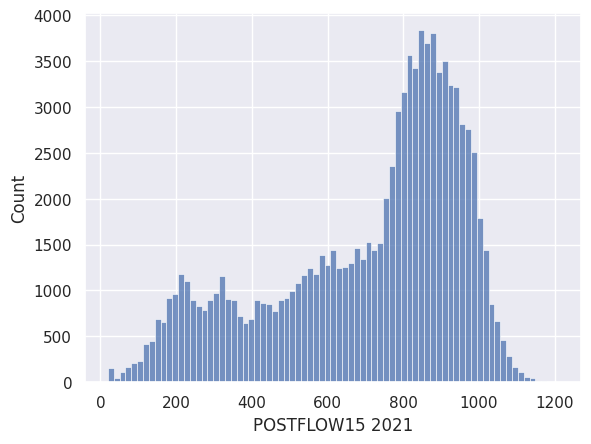

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Observing total flow
sns.set()
plt.xlabel('POSTFLOW15 2021')
sns.histplot(another_df['POSTFLOW15'])
plt.show()

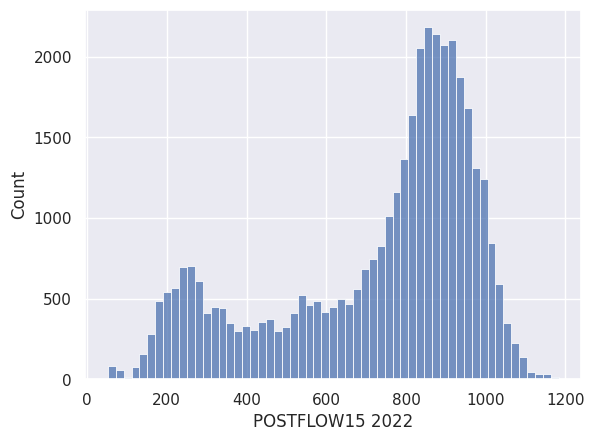

In [71]:
sns.set()
plt.xlabel('POSTFLOW15 2022')
sns.histplot(another_df_eval['POSTFLOW15'])
plt.show()

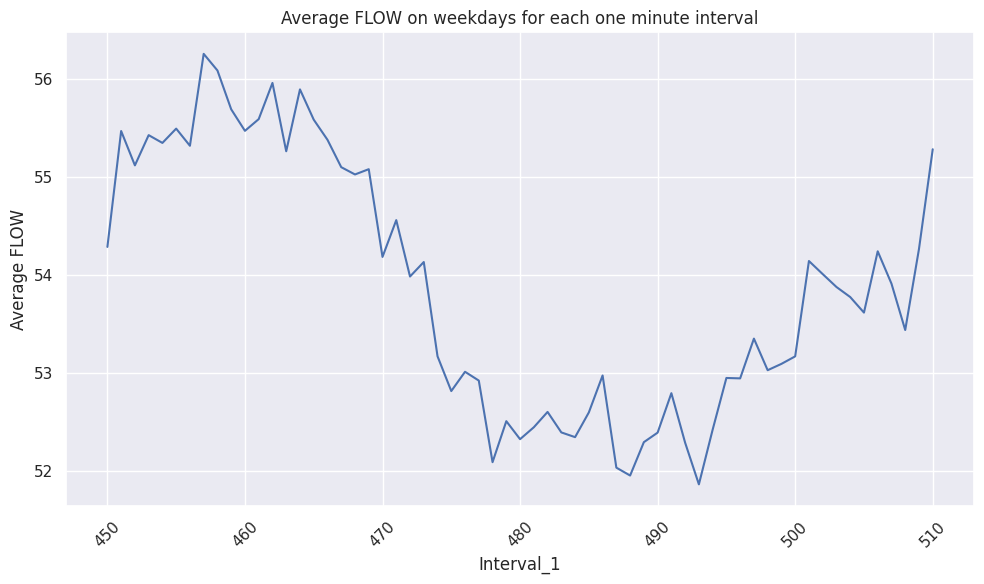

In [72]:
# Assigning weekdays/weekends
weekdays_data = another_df[another_df['Weekday'] == 1]
weekends_data = another_df[another_df['Weekday'] == 0]
df_grouped = weekdays_data.groupby('Interval_1')['FLOW'].mean()

# Plotting average FLOW on weekdays
plt.figure(figsize=(10, 6))
df_grouped.plot()

plt.xlabel('Interval_1')
plt.ylabel('Average FLOW')
plt.title('Average FLOW on weekdays for each one minute interval')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

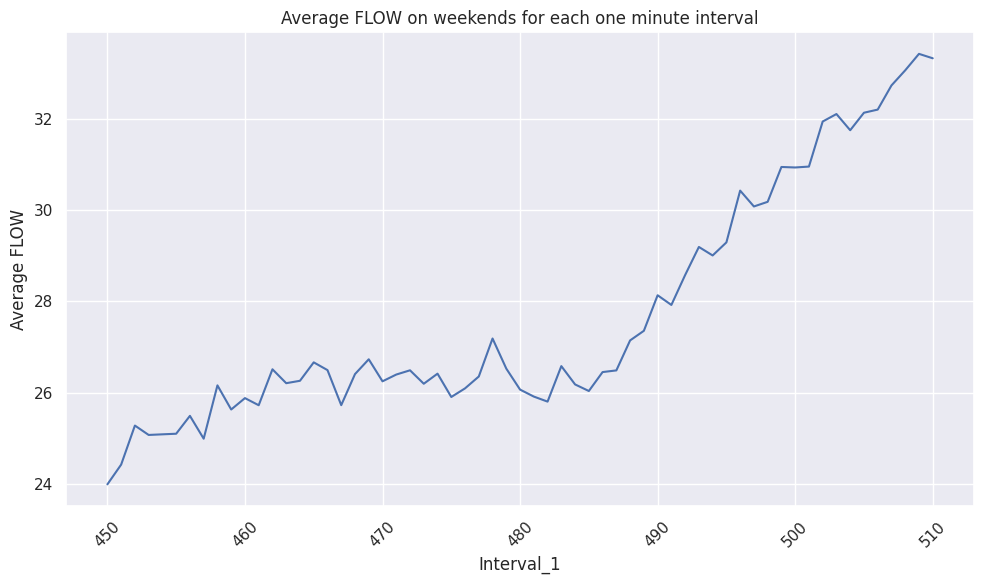

In [73]:
df_grouped = weekends_data.groupby('Interval_1')['FLOW'].mean()

# Plotting average FLOW on weekends
plt.figure(figsize=(10, 6))
df_grouped.plot()

plt.xlabel('Interval_1')
plt.ylabel('Average FLOW')
plt.title('Average FLOW on weekends for each one minute interval')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

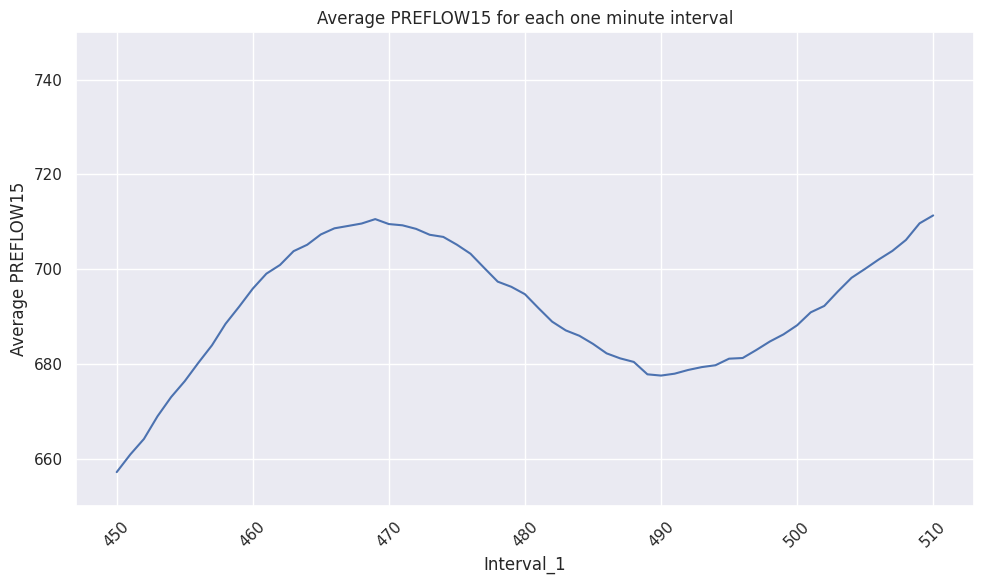

In [74]:
df_grouped = another_df.groupby('Interval_1')['PREFLOW15'].mean()

# Plotting average POSTFLOW15
plt.figure(figsize=(10, 6))
df_grouped.plot()

plt.xlabel('Interval_1')
plt.ylabel('Average PREFLOW15')
plt.title('Average PREFLOW15 for each one minute interval')

plt.ylim(650, 750)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

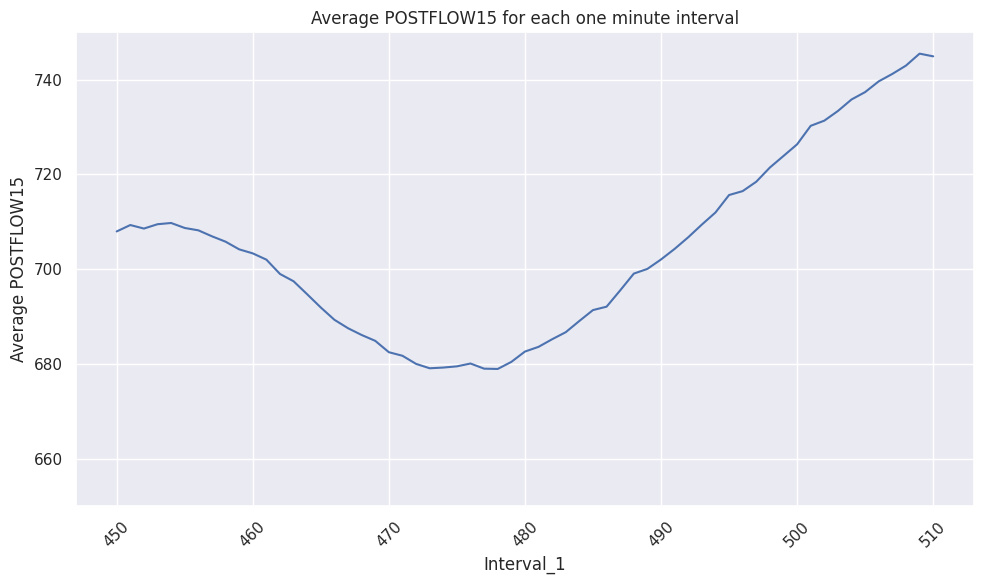

In [75]:
df_grouped = another_df.groupby('Interval_1')['POSTFLOW15'].mean()

# Plotting average POSTFLOW15
plt.figure(figsize=(10, 6))
df_grouped.plot()

plt.xlabel('Interval_1')
plt.ylabel('Average POSTFLOW15')
plt.title('Average POSTFLOW15 for each one minute interval')
plt.ylim(650, 750)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

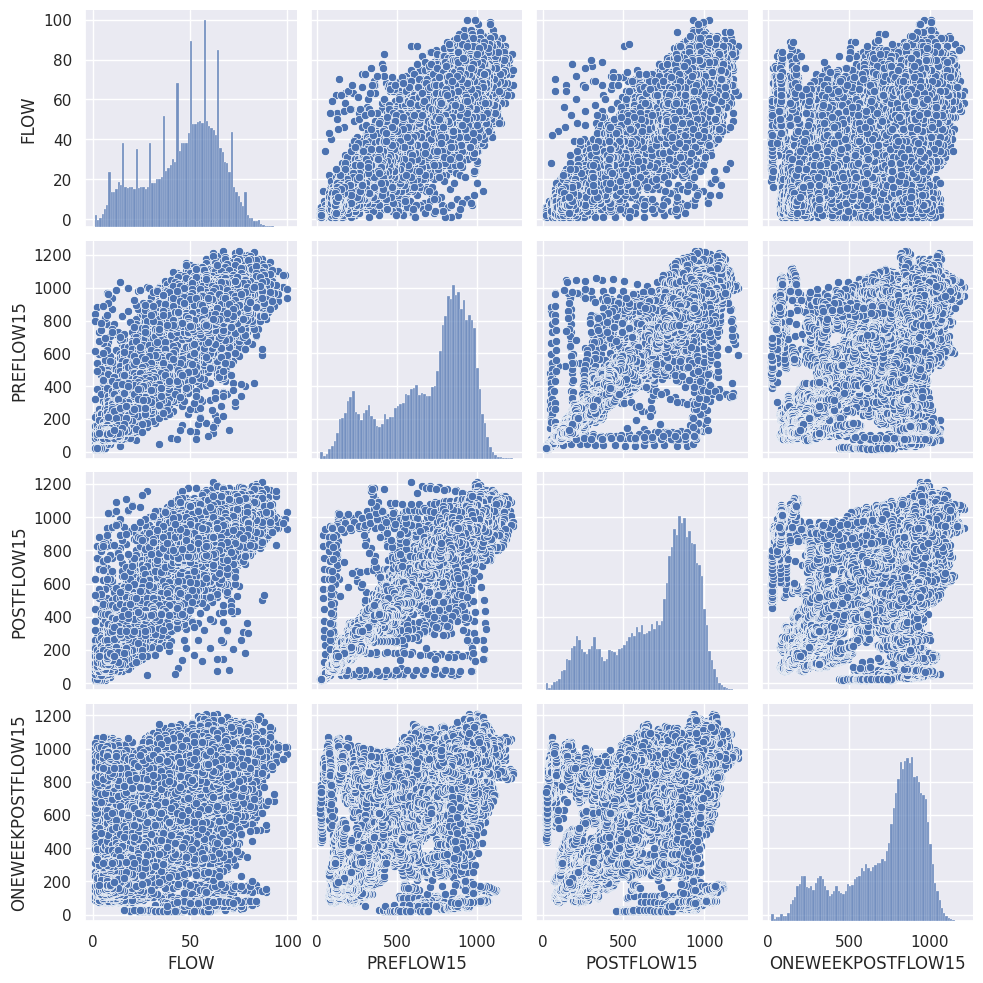

In [76]:
x_pairplot = another_df.drop(["Weekday",'PORTAL','Time','Interval_1','Interval_5','Interval_15','Interval_30','Interval_60', 'index', "Date", "SPEED_MS_AVG", "SPEED15", "Day_of_Week"], axis=1)

sns.pairplot(x_pairplot)

In [77]:
dfcorr = another_df.drop(['PORTAL','Time','Interval_1','Interval_5','Interval_15','Interval_30','Interval_60', 'index', "Date", "SPEED_MS_AVG", "Day_of_Week"], axis=1)
corr_matrix = dfcorr.corr()
corr_matrix['POSTFLOW15'].sort_values(ascending=False)

,POSTFLOW15
POSTFLOW15,1.000000
PREFLOW15,0.962709
FLOW,0.895802
ONEWEEKPOSTFLOW15,0.806892
Weekday,0.662075
SPEED15,0.122982


Mean Absolute Error: 48.64192374081462
Mean Squared Error: 4763.376386457559
R-squared: 0.9254033618774524
Mean Absolute Percentage Error: 8.475755191403213%


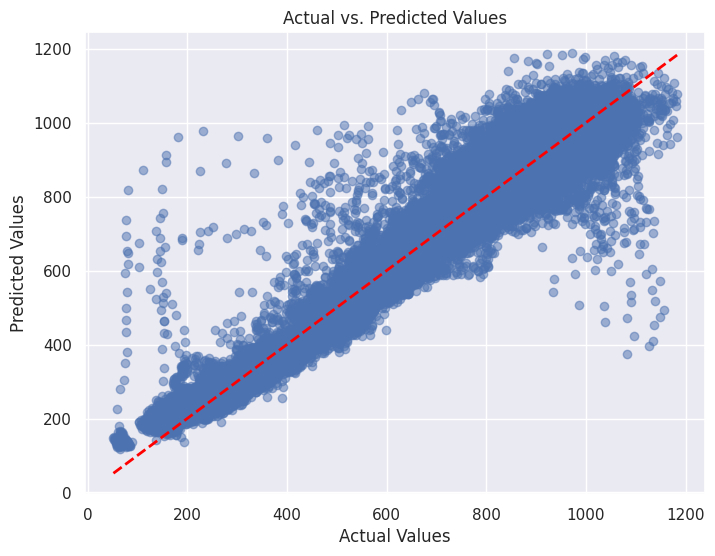

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Plotting Normal Linear Regression
X_train = another_df.drop(['POSTFLOW15','PORTAL','Time','Interval_1','Interval_5','Interval_15','Interval_30','Interval_60', 'index', "Date", "SPEED_MS_AVG", "SPEED15", "Day_of_Week"], axis=1)
y_train = another_df['POSTFLOW15']
y_test = another_df_eval['POSTFLOW15']
X_test = another_df_eval.drop(['POSTFLOW15','PORTAL','Time','Interval_1','Interval_5','Interval_15','Interval_30','Interval_60', 'index', "Date", "SPEED_MS_AVG", "SPEED15", "Day_of_Week"], axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import xgboost as xgb

# Creating XGBoost model; Grid Search
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

param_grid = {
    'n_estimators': [300, 500, 1000], # Number of trees
    'max_depth': [2,3,5], # How far the trees will go
    'learning_rate': [0.01, 0.05], # ETA
    #'subsample': [0.8], # Ratio of training instances
    #'colsample_bytree': [0.8], # Subsample ratio of columns for every tree constructed
    #'reg_alpha': [0, 0.1] # Alpha (L1) parameter to make the model more conservative (less risk of overfitting)
    #'reg_lambda': [1, 1.5, 2] # Lambda (L2) parameter to make the model more conservative (less risk of overfitting)
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best Score: -3498.356955415995


Mean Absolute Error: 45.82853194581257
Mean Squared Error: 4261.036801599319
R-squared: 0.9332702279795806
Mean Absolute Percentage Error: 7.665502980200131%


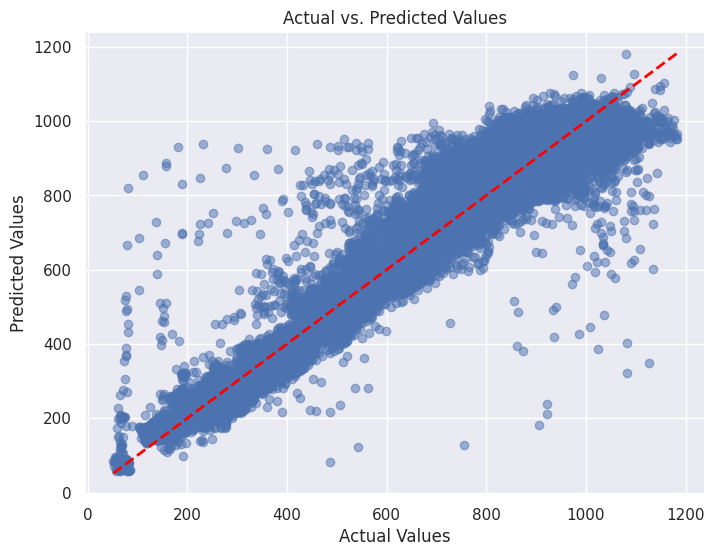

In [80]:
# Plotting the best XGBoost parameter result
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [81]:
# Save the best model
best_xgb.save_model('best_model.json')

In [82]:
# Inputs of the required values to provide a predicted result

flow15 = float(input("PREFLOW15: "))
flow = float(input("FLOW: "))
ONEWEEK = float(input("ONEWEEKPOSTFLOW15: "))
weekday = float(input("Weekday: "))
input_df = pd.DataFrame({'FLOW': [flow], 'PREFLOW15': [flow15],  'ONEWEEKPOSTFLOW15': [ONEWEEK], 'Weekday': [weekday]})
predicted_flow = best_xgb.predict(input_df)
print("Predicted POSTFLOW15:", predicted_flow[0])

PREFLOW15: 100
FLOW: 20
ONEWEEKPOSTFLOW15: 100
Weekday: 1
Predicted POSTFLOW15: 206.1721


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 41.93397, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 41.93397 to 41.56411, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 41.56411 to 41.25444, saving model to weights.best.h5.keras

Epoch 4: val_mae improved from 41.25444 to 40.62701, saving model to weights.best.h5.keras

Epoch 5: val_mae improved from 40.62701 to 40.42958, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 40.42958

Epoch 7: val_mae did not improve from 40.42958

Epoch 8: val_mae did not improve from 40.42958

Epoch 9: val_mae did not improve from 40.42958

Epoch 10: val_mae improved from 40.42958 to 40.25793, saving model to weights.best.h5.keras

Epoch 11: val_mae improved from 40.25793 to 40.15448, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 40.15448

Epoch 13: val_mae improved from 40.15448 to 39.90912, saving model to weights.best.h5.keras

Epoch 14: val_mae did no

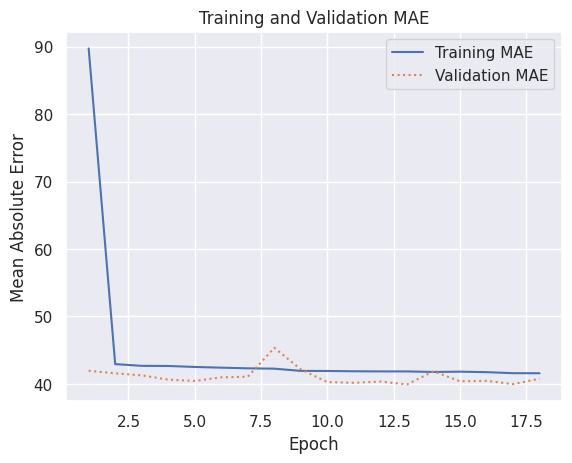

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------


# splite the train and test data
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=4))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")